<a href="https://colab.research.google.com/github/SunilKumarSingh84/Keras/blob/main/TF_Keras_Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD, Adam

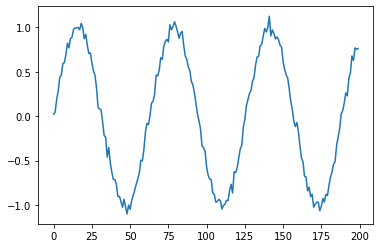

In [70]:
#Synthetic data
series = np.sin(0.1*np.arange(200)) +  np.random.randn(200)*0.05

plt.plot(series)
plt.show()

In [71]:
T=10
X=[]
Y=[]

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)

print("X.shape:", X.shape, "Y.shape", Y.shape)

X.shape: (190, 10) Y.shape (190,)


In [72]:
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i,x)
model.compile(loss='mse', optimizer = Adam(lr=0.1))

r= model.fit(X[:N//2], Y[:N//2], epochs=20, validation_data= (X[N//2:], Y[N//2:]))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
3/3 [==============================] - 0s 49ms/step - loss: 1.7221 - val_loss: 0.5741
Epoch 2/20
3/3 [==============================] - 0s 10ms/step - loss: 0.8767 - val_loss: 0.8581
Epoch 3/20
3/3 [==============================] - 0s 11ms/step - loss: 0.6422 - val_loss: 0.3383
Epoch 4/20
3/3 [==============================] - 0s 10ms/step - loss: 0.2360 - val_loss: 0.2532
Epoch 5/20
3/3 [==============================] - 0s 10ms/step - loss: 0.3084 - val_loss: 0.1743
Epoch 6/20
3/3 [==============================] - 0s 11ms/step - loss: 0.1411 - val_loss: 0.0336
Epoch 7/20
3/3 [==============================] - 0s 10ms/step - loss: 0.0371 - val_loss: 0.0816
Epoch 8/20
3/3 [==============================] - 0s 10ms/step - loss: 0.0932 - val_loss: 0.0507
Epoch 9/20
3/3 [==============================] - 0s 10ms/step - loss: 0.0428 - val_loss: 0.0404
Epoch 10/20
3/3 [==============================] - 0s 11ms/step - loss: 0.0430 - val_loss: 0.0993
Epoch 11/20
3/3 [============

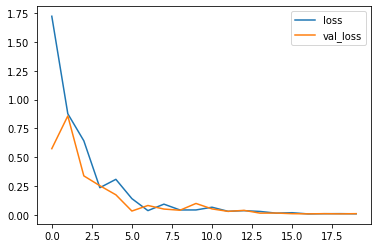

In [73]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()